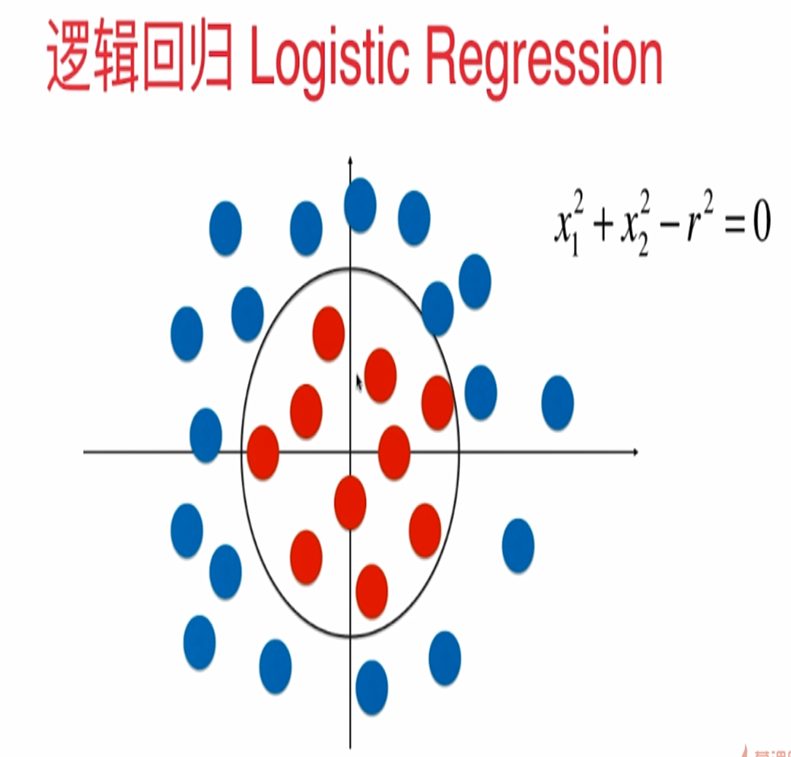

## 逻辑回归中添加多项式特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y = np.array(X[:,0] ** 2 + X[:,1]**2 < 1.5,dtype='int')

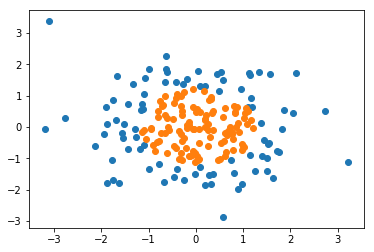

In [4]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

## 使用逻辑回归

In [6]:
from playML.LogisticRegression import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X,y)

LinearRegression

In [7]:
log_reg.score(X,y)

0.605

In [9]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100))
    )
    x_new=np.c_[x0.ravel(),x1.ravel()]
    
    y_predict=model.predict(x_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


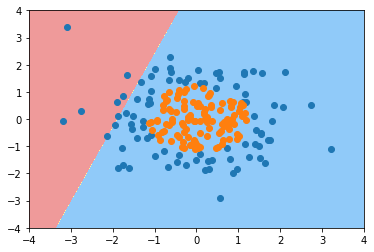

In [10]:
plot_decision_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression()),
    ])

In [12]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LinearRegression)])

In [13]:
poly_log_reg.score(X,y)

0.95

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


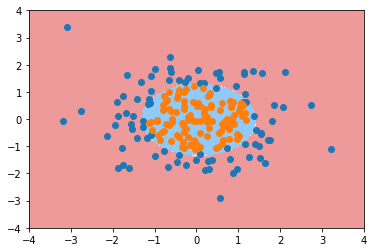

In [14]:
plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [15]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LinearRegression)])

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


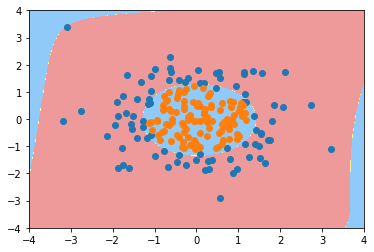

In [16]:
plot_decision_boundary(poly_log_reg2,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()